In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

Logistic regression is a statistical method used for predicting the probability of a binary outcome based on one or more predictor variables. It models the relationship between the independent variables and the dependent variable by estimating probabilities using a logistic function.

## Intuition

Logistic regression is like fitting a curve to data points on a graph. Imagine plotting points representing different instances, each classified into one of two categories. Logistic regression aims to draw a smooth curve that best separates these points into their respective classes. This curve represents the probability of an instance belonging to one class versus the other. By applying a logistic (sigmoid) function to the linear combination of input features, logistic regression transforms the output into probabilities, allowing for straightforward interpretation and classification. In essence, it's about finding the optimal curve to delineate between different categories based on given features.

$$z_i = \beta_0 + \beta_1x_i + \beta_2x_i + \cdots \beta_nx_i$$

**Sigmoid Function:**
$$\hat{p} = \sigma(z) = \frac{1}{1+e^{-z}}$$

![](https://media.licdn.com/dms/image/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=OtnfeqwCtKTSVrdKZdyOzNYECyLLZuEUIxkTfTQ0dS0)

$$\hat{y} = \begin{cases} 1 & \text{if } \hat{p} \geq 0.5 \\ 0 & \text{if } \hat{p} < 0.5 \end{cases}$$

**Cost Function**:
$$\mathcal{J}(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$$

## Types of Classification

1. Binary Classification
2. Multinomial Classification

### Binary Classification

It involves predicting one of two possible outcomes based on input features. The model estimates the probability that an instance belongs to one of the two classes and then classifies it into the class with the highest probability. It uses a logistic (sigmoid) function to map the output of a linear combination of features to probabilities, making it suitable for problems with two classes.

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

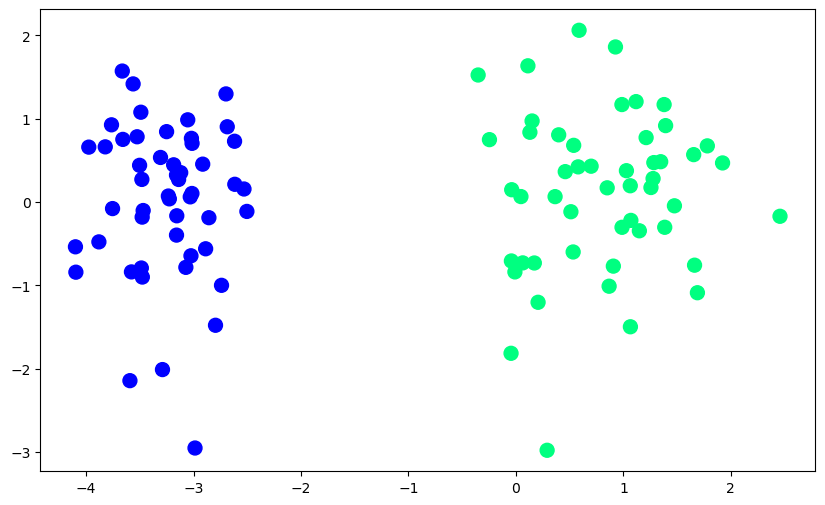

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100);

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')

lor.fit(X,y)

LogisticRegression(penalty='none', solver='sag')

In [7]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]


In [10]:
coef_,intercept_ = gd(X,y)

In [11]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

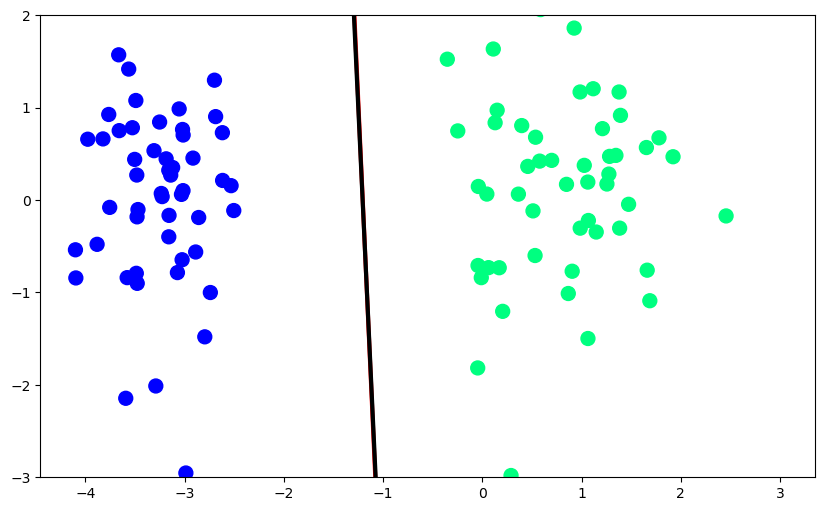

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2);

### Multinomial Classification

It is an extension of logistic regression used for classifying instances into three or more mutually exclusive classes. It estimates the probability of each class using the softmax function, which generalizes the logistic function to multiple classes. The model computes a separate set of weights for each class, and the class with the highest predicted probability is assigned to the instance.

**Softmax Function:**
$$\text{softmax}(z_j) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$$
Where,
- k $\to$ classes

**Cost Function**:
$$L = \frac{-1}{n} \sum_{i=1}^{N} \sum_{k=1}^K y_k^i \log \hat{y^i_k}$$

In [13]:
import seaborn as sns
df = sns.load_dataset('iris')

df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
122,7.7,2.8,6.7,2.0,virginica
15,5.7,4.4,1.5,0.4,setosa
52,6.9,3.1,4.9,1.5,versicolor
44,5.1,3.8,1.9,0.4,setosa


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])

In [15]:
df = df[['sepal_length','petal_length','species']]
df.sample(5)

,sepal_length,petal_length,species
3,4.6,1.5,0
48,5.3,1.5,0
29,4.7,1.6,0
49,5.0,1.4,0
130,7.4,6.1,2


In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2002)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8666666666666667

In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)))

,0,1,2
0,12,0,0
1,0,6,2
2,0,2,8


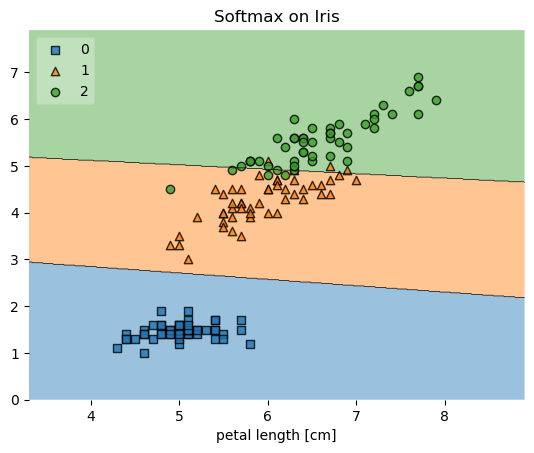

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

## Types of Logistic Regression

1. Linear Logistic Regression
2. Polynomial Logistic Regression

### Linear Logistic Regression

It assumes a linear relationship between the independent variables and the log-odds of the dependent variable, making it suitable for problems where the decision boundary between classes is linear.

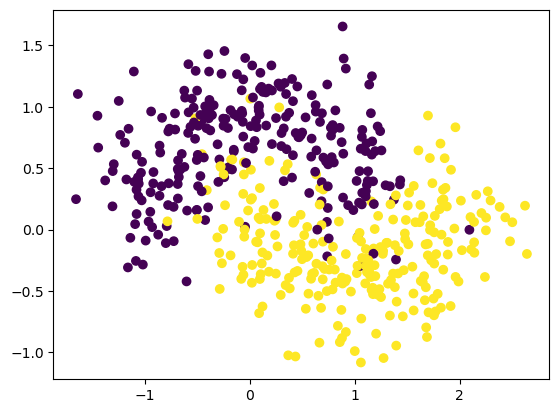

In [21]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.3)

plt.scatter(X[:,0],X[:,1],c=y);

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X,y)

LogisticRegression()

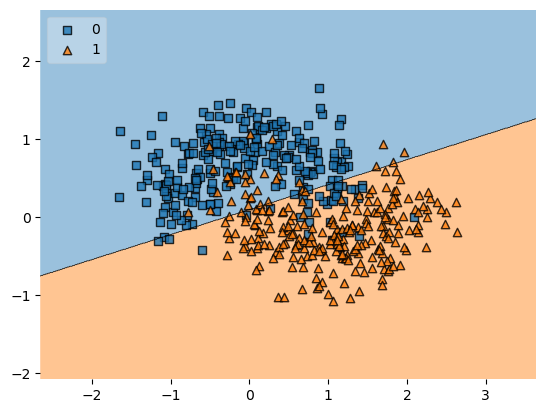

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf, legend=2);

In [25]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8619999999999999

### Polynomial Logistic Regression

This allows for capturing nonlinear relationships between the features and the outcome variable. It can be useful when the relationship between the features and the target variable is not strictly linear, allowing for more flexible modeling of complex relationships.

Degree = 2; Features = 2
$$ X_0^0, X_0^1, X_0^2 \text{ and } X_1^0, X_1^1, X_1^2 \text{ are the new transformed features for the given degree and features.}$$

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)

X_trf = poly.fit_transform(X)
clf1 = LogisticRegression()

In [27]:
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9099999999999999

In [28]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


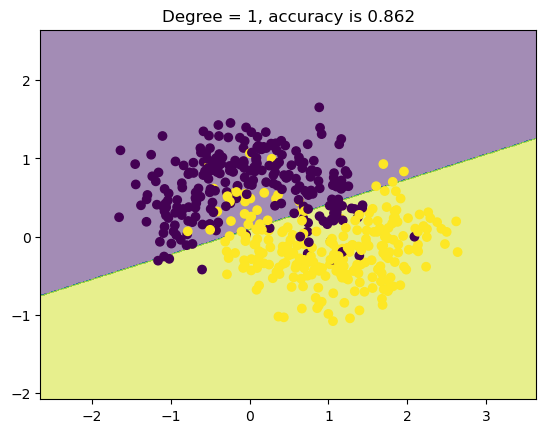

In [29]:
plot_decision_boundary(X,y)

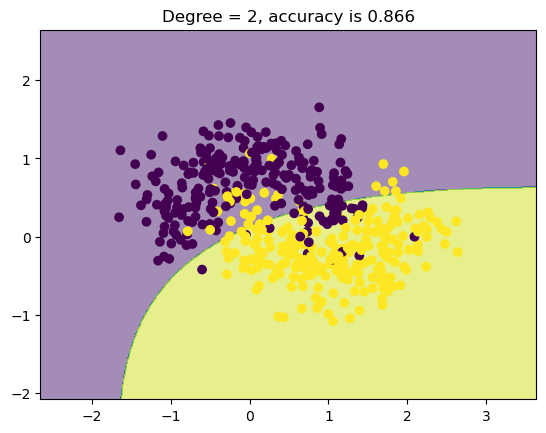

In [30]:
plot_decision_boundary(X,y,degree=2)

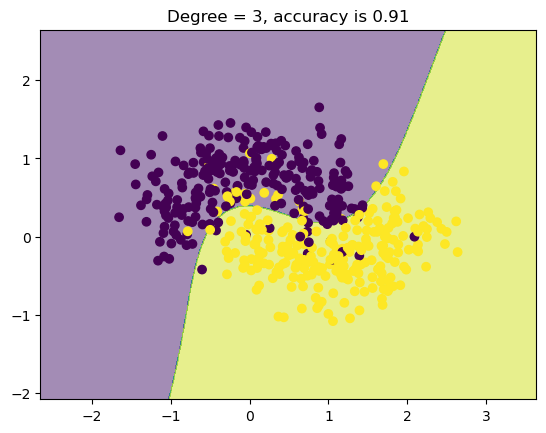

In [31]:
plot_decision_boundary(X,y,degree=3)

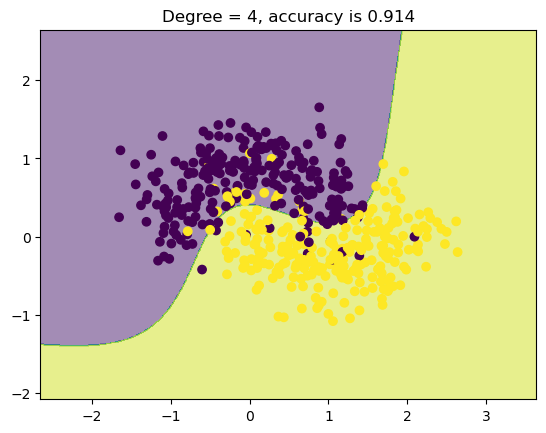

In [32]:
plot_decision_boundary(X,y,degree=4)

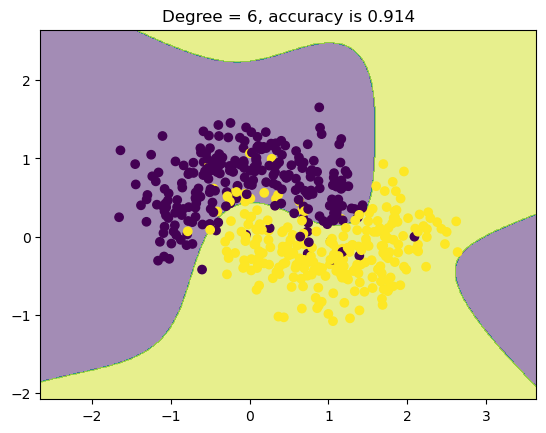

In [33]:
plot_decision_boundary(X,y,degree=6)